## Real News Vs Fake News Classification

In [1]:
import nltk
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt 

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


### Fake or Real News dataset loading

In [2]:
data = pd.read_csv('Fake Real News.csv')
data

,sn,title,text,label
0,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,2,NaN,Did they post their votes for Hillary already?,1
2,3,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,4,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,5,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
1271,1272,Here’s The One Thing That Scares Trump And Hi...,We are all aware by now of Donald Trump s raci...,1
1272,1273,"How a U.S. Airstrike Missed ISIS, but Damaged ...",WASHINGTON — The United States’ accidental ...,0
1273,1274,James Turk – What Donald Trump Faces Is Very D...,55 King World News \nAs we kick off the thir...,1
1274,1275,BREAKING : HOAX “RAPE LAWSUIT” AGAINST TRUMP I...,BREAKING : HOAX “RAPE LAWSUIT” AGAINST TRUMP I...,1


### Handling NULL values in the dataset

In [3]:
data.isnull().sum()

sn       0
title    8
text     0
label    0
dtype: int64

In [4]:
data = data.dropna()

In [5]:
data.isnull().sum()

sn       0
title    0
text     0
label    0
dtype: int64

In [6]:
data['title'].shape, data['text'].shape ,data['label'].shape

((1268,), (1268,), (1268,))

In [7]:
data['label'].value_counts()

1    672
0    596
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

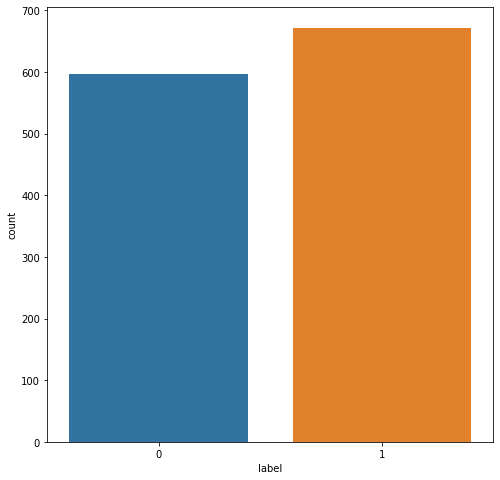

In [8]:
# plot the number of samples per class
plt.figure(figsize=(8,8))
sns.countplot(x="label", data=data)

#### Merging the columns (title, text) into one column (say tags)

In [9]:
data['tags']=data['title']+ data['text']
data['tags']

C:\Users\Arjyel\AppData\Local\Temp\ipykernel_24364\3536953010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tags']=data['title']+ data['text']


0       LAW ENFORCEMENT ON HIGH ALERT Following Threat...
2       UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3       Bobby Jindal, raised Hindu, uses story of Chri...
4       SATAN 2: Russia unvelis an image of its terrif...
5       About Time! Christian Group Sues Amazon and SP...
                              ...                        
1271     Here’s The One Thing That Scares Trump And Hi...
1272    How a U.S. Airstrike Missed ISIS, but Damaged ...
1273    James Turk – What Donald Trump Faces Is Very D...
1274    BREAKING : HOAX “RAPE LAWSUIT” AGAINST TRUMP I...
1275    Alabama's Top Judge Faces Ethics Charges Over ...
Name: tags, Length: 1268, dtype: object

In [10]:
data['tags'].shape ,data['label'].shape

((1268,), (1268,))

In [11]:
data

,sn,title,text,label,tags
0,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
2,3,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3,4,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,5,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...
5,6,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,About Time! Christian Group Sues Amazon and SP...
...,...,...,...,...,...
1271,1272,Here’s The One Thing That Scares Trump And Hi...,We are all aware by now of Donald Trump s raci...,1,Here’s The One Thing That Scares Trump And Hi...
1272,1273,"How a U.S. Airstrike Missed ISIS, but Damaged ...",WASHINGTON — The United States’ accidental ...,0,"How a U.S. Airstrike Missed ISIS, but Damaged ..."
1273,1274,James Turk – What Donald Trump Faces Is Very D...,55 King World News \nAs we kick off the thir...,1,James Turk – What Donald Trump Faces Is Very D...
1274,1275,BREAKING : HOAX “RAPE LAWSUIT” AGAINST TRUMP I...,BREAKING : HOAX “RAPE LAWSUIT” AGAINST TRUMP I...,1,BREAKING : HOAX “RAPE LAWSUIT” AGAINST TRUMP I...


the 40370
to 20617
of 17975
and 16784
in 13509
that 9312
for 6759
on 6701
is 6700
it 5442
he 4567
with 4552
as 4462
was 4362
trump 4140
said 4020
by 3652
his 3420
be 3209
at 3179


<AxesSubplot:title={'center':'Top 20 words in dataset which are maximum stop words'}, xlabel='tags'>

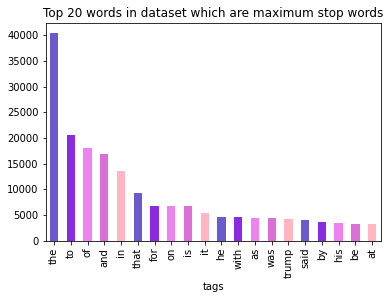

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(data['tags'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['tags' , 'count'])
df1.groupby('tags').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20 words in dataset which are maximum stop words',color=['slateblue', 'blueviolet', 'violet', 'orchid', 'lightpink'])

### Cleaning and Preprocessing
Removing of punctuation, stopwords and performing word tokenization, stemming and lemmatization

In [13]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [wn.lemmatize(ps.stem((word))) for word in tokens if word not in stopwords]
    return text

In [14]:
data['tags'] = data['tags'].apply(clean_text)
data['tags'] 

C:\Users\Arjyel\AppData\Local\Temp\ipykernel_24364\727531360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tags'] = data['tags'].apply(clean_text)


0       [law, enforc, high, alert, follow, threat, cop...
2       [unbeliev, obama, attorney, gener, say, charlo...
3       [bobbi, jindal, rais, hindu, use, stori, chris...
4       [satan, 2, russia, unv, imag, terrifi, new, su...
5       [time, christian, group, sue, amazon, splc, de...
                              ...                        
1271    [, one, thing, scare, trump, racist, follow, v...
1272    [u, airstrik, miss, isi, damag, u, polici, syr...
1273    [jame, turk, donald, trump, face, differ, rona...
1274    [break, hoax, rape, lawsuit, trump, drop, trut...
1275    [alabama, top, judg, face, ethic, charg, gayma...
Name: tags, Length: 1268, dtype: object

In [15]:
data=data[['tags','label']]
data

,tags,label
0,"[law, enforc, high, alert, follow, threat, cop...",1
2,"[unbeliev, obama, attorney, gener, say, charlo...",1
3,"[bobbi, jindal, rais, hindu, use, stori, chris...",0
4,"[satan, 2, russia, unv, imag, terrifi, new, su...",1
5,"[time, christian, group, sue, amazon, splc, de...",1
...,...,...
1271,"[, one, thing, scare, trump, racist, follow, v...",1
1272,"[u, airstrik, miss, isi, damag, u, polici, syr...",0
1273,"[jame, turk, donald, trump, face, differ, rona...",1
1274,"[break, hoax, rape, lawsuit, trump, drop, trut...",1


#### TF-iDF Vectorizer

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['tags'].apply(lambda x: np.str_(x)))

In [17]:
X =  pd.DataFrame(X_tfidf.toarray())
X.head()

,0,1,2,3,4,5,6,7,8,9,...,28328,28329,28330,28331,28332,28333,28334,28335,28336,28337
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.005814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
Y = data['label']
Y.head()

0    1
2    1
3    0
4    1
5    1
Name: label, dtype: int64

In [19]:
data['label'].shape , X.shape

((1268,), (1268, 28338))

### Train-Test Spliting of data

In [20]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

### Random Forest Classification

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)

rf_model = rf.fit(X_train, y_train)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = rf_model.predict(X_test)
pd.DataFrame(data={'predicted value':y_pred,'actual value':y_test})

,predicted value,actual value
1154,0,0
39,1,1
1096,0,0
1147,0,0
902,0,0
...,...,...
393,0,0
6,1,1
769,1,1
455,0,0


In [23]:
print('Classification Report for Random Forest Classifier \n',classification_report(y_test, y_pred))

Classification Report for Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.90      0.82      0.86       124
           1       0.84      0.92      0.88       130

    accuracy                           0.87       254
   macro avg       0.87      0.87      0.87       254
weighted avg       0.87      0.87      0.87       254



Confusion Matrix for Random Forest Classifier


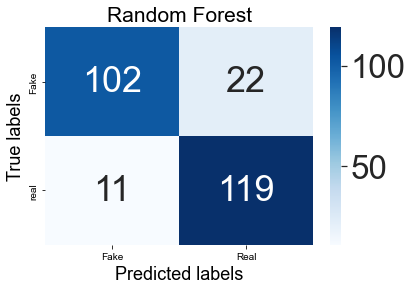

In [24]:
cm = confusion_matrix(y_test, y_pred, labels = [0,1])
print('Confusion Matrix for Random Forest Classifier')
ax = plt.subplot()
sns.set(font_scale=3.0) # Adjust to fit
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");  

# Labels, title and ticks
label_font = {'size':'18'}  # Adjust to fit
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('True labels', fontdict=label_font);

title_font = {'size':'21'}  # Adjust to fit
ax.set_title('Random Forest', fontdict=title_font);
ax.tick_params(axis='both', which='major', labelsize=10)  # Adjust to fit
ax.xaxis.set_ticklabels(['Fake', 'Real']);
ax.yaxis.set_ticklabels(['Fake', 'real']);
plt.show()

### Gradient Boosting Classification

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gbc_model = gbc.fit(X, Y)
y_pred = gbc_model.predict(X_test)

pd.DataFrame(data={'predicted value':y_pred,'actual value':y_test})

,predicted value,actual value
1154,0,0
39,1,1
1096,0,0
1147,0,0
902,0,0
...,...,...
393,0,0
6,1,1
769,1,1
455,0,0


In [26]:
print('Classification Report for Gradient Boosting Classifier \n',classification_report(y_test, y_pred))

Classification Report for Gradient Boosting Classifier 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       1.00      1.00      1.00       130

    accuracy                           1.00       254
   macro avg       1.00      1.00      1.00       254
weighted avg       1.00      1.00      1.00       254



Confusion Matrix Gradient Boosting Classifier




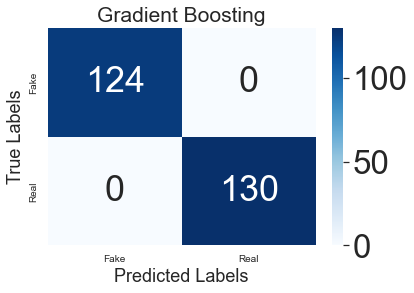

In [27]:
cm = confusion_matrix(y_test, y_pred, labels = [0,1])

print('Confusion Matrix Gradient Boosting Classifier')
ax = plt.subplot()
sns.set(font_scale=3.0) # Adjust to fit
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");  

# Labels, title and ticks
label_font = {'size':'18'}  # Adjust to fit
ax.set_xlabel('Predicted Labels', fontdict=label_font);
ax.set_ylabel('True Labels', fontdict=label_font);

title_font = {'size':'21'}  # Adjust to fit

ax.set_title('Gradient Boosting', fontdict=title_font);
print("\n")

ax.tick_params(axis='both', which='major', labelsize=10)  # Adjust to fit
ax.xaxis.set_ticklabels(['Fake', 'Real']);
ax.yaxis.set_ticklabels(['Fake', 'Real']);
plt.show()

#### Conclusion
The precision, recall, f1-score and accuracy from  Gradient Boosting Classification Model is 100%. Thus, Gradient Boosting Classification Mode is the best model.